# U-Net Model

# 1. Import All Necessary Libraries and Create File Paths

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import random

# Plotting
import matplotlib.pyplot as plt

# Modelling CNN
import tensorflow as tf
import tensorflow_addons as tfa
import glob
import math
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import albumentations as A
from tqdm import tqdm
import math
import datetime
from keras import backend as K

In [2]:
# folder path or file path constants that will be used in this project
# Root Directory (between 'F:' or 'D:'' depends on the external drive)
ROOT = "D:\\"

# Folder inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_DATASET_FOLDER_PATH = os.path.join(ROOT, 'wildfire-sumatera-dataset')


# Folders and metadatas inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-geotiff')
WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image')
WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask')
WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'wildfire-sumatera-image-mask-tfrecords')

# Files (.csv) and metadatas inside D:\\wildfire-sumatera-dataset
METADATA_LANDSAT_8_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_landsat_8.csv')
METADATA_SENTINEL_2_FILE_PATH = os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_sentinel_2.csv')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff
SENTINEL_2_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_GEOTIFF_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image
SENTINEL_2_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH, 'landsat-8')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8
LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'prefire')
LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(LANDSAT_8_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\sentinel-2
SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'prefire')
SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH = os.path.join(SENTINEL_2_GEOTIFF_FOLDER_PATH, 'postfire')

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image-mask
SENTINEL_2_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'sentinel-2')
LANDSAT_8_IMAGE_MASK_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH, 'landsat-8')

# Folders inside
SENTINEL_2_B12_B8_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'sentinel-2_b12_b8_b2')
LANDSAT_8_B7_B5_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'landsat-8_b7_b5_b2')
SENTINEL_2_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'sentinel-2_b4_b3_b2')
LANDSAT_8_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH = os.path.join(WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH, 'landsat-8_b4_b3_b2')


dirs = [
    WILDFIRE_SUMATERA_DATASET_FOLDER_PATH,
    WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 
    WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    
    SENTINEL_2_GEOTIFF_FOLDER_PATH, 
    LANDSAT_8_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_IMAGE_FOLDER_PATH,
    LANDSAT_8_IMAGE_FOLDER_PATH,
    
    LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH,
    LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_FOLDER_PATH,
    
    SENTINEL_2_B12_B8_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    LANDSAT_8_B7_B5_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    SENTINEL_2_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH,
    LANDSAT_8_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH,

]

for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
        print(f"{dir_} has been created")
    else:
        print(f"{dir_} already exist")

D:\wildfire-sumatera-dataset already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask-tfrecords already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist
D

# 2. Constants


In [3]:
RANDOM_STATE = 42
SEED = RANDOM_STATE
LEARNING_RATE = 0.001
BATCH_SIZE = 32
STARTING_FILTER = 16
WIDTH = 112
HEIGHT = 112
CHANNEL = 3
INPUT_SHAPE = (HEIGHT, WIDTH, CHANNEL)
OPTIMIZER_NAME = 'adam'
AUTOTUNE = tf.data.experimental.AUTOTUNE

# 3. Prepare Data

In [4]:
def parse_tfrecord_fn(example):
    """
    :param example: A scalar string Tensor (a single serialized example)
    :return: image and mask data in Tensor form
    """
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "mask": tf.io.FixedLenFeature([], tf.string),
        "height": tf.io.FixedLenFeature([], tf.int64),
        "width": tf.io.FixedLenFeature([], tf.int64),
        "label": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, feature_description)
    
    example["image"] = tf.io.decode_png(example["image"])
    img_arr = tf.reshape(example["image"], (example["height"], example["width"], CHANNEL))
    example["mask"] = tf.io.decode_png(example["mask"])
    mask = tf.reshape(example["mask"], (example["height"], example["width"], 1))
    
    return example["image"], example["mask"], example["label"] 

In [5]:
def set_shapes(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: reshaped image and mask data in Tensor form
    """
    image.set_shape(INPUT_SHAPE)
    mask.set_shape((WIDTH, HEIGHT, 1))
    return image, mask

def normalize_image_mask(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: normalized image and mask data in Tensor form
    """
    image = image/255
    mask = mask/255
    return tf.cast(image, tf.dtypes.float32), tf.cast(mask, tf.dtypes.uint8)

def resize_image_mask(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: resized image and mask data in Tensor form
    """
    image = tf.image.resize(image, (WIDTH, HEIGHT), method='nearest')
    mask = tf.image.resize(mask, (WIDTH, HEIGHT), method='nearest')
    return image, mask

augmentation = A.Compose([    
    A.ShiftScaleRotate(shift_limit=[-0.2, 0.2], 
                       scale_limit=[-0.2, 0.2], 
                       rotate_limit=[-90, 90]),
    A.OneOf([
        A.ElasticTransform(p=0.7),
        A.GridDistortion(p=0.7),
        A.OpticalDistortion(p=0.7)                  
    ]),
])

    
def augment_func(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: augmented image and mask data in Tensor form
    """
    # resize image and mask
    image, mask = resize_image_mask(image, mask)
    
    # augmentation
    data = {"image": image.numpy(), 'mask': mask.numpy()}
    aug_data = augmentation(**data)
    aug_image, aug_mask = aug_data["image"], aug_data["mask"]
    
    # normalize image and mask
    aug_image, aug_mask = normalize_image_mask(aug_image, aug_mask)
    return aug_image, aug_mask

def process_data(image, mask):
    """
    :param image: image in Tensor form
    :param mask: mask in Tensor form
    :return: augmented image and mask data in Tensor form
    
    **info: this function is just a bridge for data augmentation because in order
    to do an image augmentation usiing Albumentation, requires a tf.numpy_function.
    """
    aug_image, aug_mask = tf.numpy_function(
        func=augment_func, 
        inp=[image, mask],
        Tout=[tf.float32, tf.uint8],
    )
    return aug_image, aug_mask

## Using All Data

In [6]:
# return list of tfrecords using glob
files = glob.glob(os.path.join(LANDSAT_8_B4_B3_B2_IMAGE_MASK_TFRECORD_FOLDER_PATH, '*.tfrec'), recursive=False)

# shuffled the filse using random sample 
random.seed(SEED)
shuffled_files = random.sample(files, len(files))

# split the shuffled file for train, validation, test
len_dataset = len(shuffled_files)

train_size = math.floor(0.6 * len_dataset)
validation_size = math.ceil(0.2 * len_dataset)
test_size = math.ceil(0.2 * len_dataset)

train_files = shuffled_files[:train_size]
validation_files = shuffled_files[train_size:train_size+validation_size]
test_files = shuffled_files[train_size+validation_size:]

# return a dataset consists of multiple files
parsed_train_dataset = tf.data.TFRecordDataset(train_files, num_parallel_reads=AUTOTUNE).map(parse_tfrecord_fn)
parsed_validation_dataset = tf.data.TFRecordDataset(validation_files, num_parallel_reads=AUTOTUNE).map(parse_tfrecord_fn)
parsed_test_dataset = tf.data.TFRecordDataset(test_files, num_parallel_reads=AUTOTUNE).map(parse_tfrecord_fn)

In [7]:
# get all images and masks
# image augmentation, resizing and normalization on the train dataset
train_dataset = parsed_train_dataset.map(lambda image, mask, _: process_data(image, mask), 
                                         num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()

train_dataset = train_dataset.map(set_shapes, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                .shuffle(1000) \
                .batch(BATCH_SIZE) \
                .prefetch(tf.data.experimental.AUTOTUNE)

# resizing and normalization on the validation dataset
validation_dataset = parsed_validation_dataset.map(lambda image, mask, _: resize_image_mask(image, mask), 
                                                   num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
validation_dataset = validation_dataset.map(normalize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
validation_dataset = validation_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# resizing and normalization on the test dataset
test_dataset = parsed_test_dataset.map(lambda image, mask, _: resize_image_mask(image, mask), 
                                       num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
test_dataset = test_dataset.map(normalize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

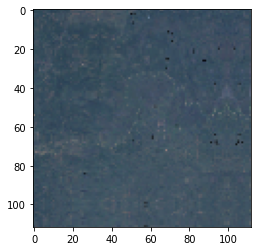

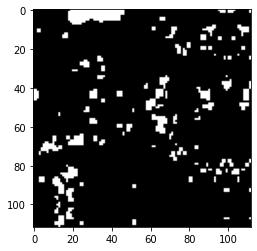

In [8]:
for d in train_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

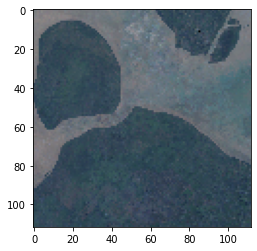

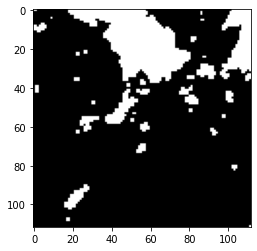

In [9]:
for d in validation_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

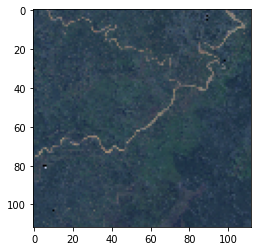

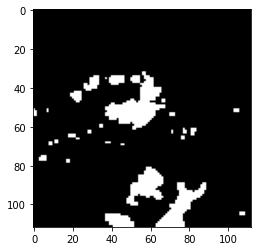

In [10]:
for d in test_dataset.take(1):
    image = d[0][0].numpy()
    mask = d[1][0].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

# 3. Get U-Net Model

<p align="center">
    <img src="images/u-net-architecture.png" alt="U-Net Architecture">
</p>

In [8]:
import models.unet_model as unet

unet_model_original = unet.get_model(
    input_shape=INPUT_SHAPE,
    starting_filter=STARTING_FILTER,
)
display(unet_model_original.summary())

Model: "unet-model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 112, 112, 16  2320        ['conv2d[0][0]']                 
                                )                                                        

 concatenate_3 (Concatenate)    (None, 112, 112, 32  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 dropout_7 (Dropout)            (None, 112, 112, 32  0           ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_16 (Conv2D)             (None, 112, 112, 16  4624        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 112, 112, 16  2320        ['conv2d_16[0][0]']              
          

None

# 4. Prepare metrics

In [9]:
def dice_coef(y_true, y_pred):
    """
    :param y_true: tensors contain ground truth values
    :param y_pred: tensors contain predicted values
    :return: dice coefficient value
    """
    X = tf.cast(K.flatten(y_true), tf.dtypes.float32)
    Y = tf.cast(K.flatten(y_pred), tf.dtypes.float32)
    intersection = K.sum(X * Y)
    return 2 * intersection/ (K.sum(X) + K.sum(Y))

def jaccard_coef(y_true, y_pred):
    """
    :param y_true: tensors contain ground truth values
    :param y_pred: tensors contain predicted values
    :return: jaccard coefficient value
    """
    X = tf.cast(K.flatten(y_true), tf.dtypes.float32)
    Y = tf.cast(K.flatten(y_pred), tf.dtypes.float32)
    intersection = K.sum(X * Y)
    union = K.sum(X) + K.sum(Y) - intersection
    return intersection/ union

# 5. Compile Model
Using:
1. Loss Function : Binary Cross Entropy
2. Metrics : Binary Accuracy (Accuracy), Dice Coefficient, Binary Intersection over Union (BinaryIoU)


In [10]:
RANDOM_STATE = 42
SEED = RANDOM_STATE
LEARNING_RATE = 0.001
BATCH_SIZE = 32
STARTING_FILTER = 16
WIDTH = 112
HEIGHT = 112
CHANNEL = 3
INPUT_SHAPE = (HEIGHT, WIDTH, CHANNEL)
OPTIMIZER_NAME = 'adam'
AUTOTUNE = tf.data.experimental.AUTOTUNE

# 6. Train Using All Data

In [12]:
# Compile Model
unet_model = tf.keras.models.clone_model(unet_model_original)

if OPTIMIZER_NAME == 'adam':
    unet_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_iou")],
    )
elif OPTIMIZER_NAME == 'rmsprop':
    unet_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),
        metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_iou")],
    )


date = datetime.datetime.now().strftime("%Y%m%d")
epochs=20

model_path = "models/landsat_8/unet_model_opt_{}_lr_{}_batch_{}_epochs_{}_filters_{}_size_{}_date_{}". \
          format(OPTIMIZER_NAME, LEARNING_RATE, BATCH_SIZE, epochs, STARTING_FILTER, INPUT_SHAPE[0], date)

log_dir = "logs/fit/landsat_8/unet_model_opt_{}_lr_{}_batch_{}_epochs_{}_filters_{}_size_{}_date_{}". \
          format(OPTIMIZER_NAME, LEARNING_RATE, BATCH_SIZE, epochs, STARTING_FILTER, INPUT_SHAPE[0], date)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 2),
    tf.keras.callbacks.ModelCheckpoint(
        filepath = model_path, 
        monitor = 'val_dice_coef', 
        save_best_only = True,
        mode = 'max', 
        verbose = 2,
    ),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
]

history = unet_model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

In [14]:
LEARNING_RATE = 0.01

In [18]:
# Compile Model
unet_model = tf.keras.models.clone_model(unet_model_original)

if OPTIMIZER_NAME == 'adam':
    unet_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_iou")],
    )
elif OPTIMIZER_NAME == 'rmsprop':
    unet_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE),
        metrics=['accuracy', dice_coef, tf.keras.metrics.BinaryIoU(target_class_ids=[0, 1], threshold=0.5, name="binary_iou")],
    )


date = datetime.datetime.now().strftime("%Y%m%d")
epochs=20

model_path = "models/landsat_8_b4_b3_b2/unet_model_opt_{}_lr_{}_batch_{}_epochs_{}_filters_{}_size_{}_date_{}". \
          format(OPTIMIZER_NAME, LEARNING_RATE, BATCH_SIZE, epochs, STARTING_FILTER, INPUT_SHAPE[0], date)

log_dir = "logs/fit/landsat_8_b4_b3_b2/unet_model_opt_{}_lr_{}_batch_{}_epochs_{}_filters_{}_size_{}_date_{}". \
          format(OPTIMIZER_NAME, LEARNING_RATE, BATCH_SIZE, epochs, STARTING_FILTER, INPUT_SHAPE[0], date)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 2),
    tf.keras.callbacks.ModelCheckpoint(
        filepath = model_path, 
        monitor = 'val_dice_coef', 
        save_best_only = True,
        mode = 'max', 
        verbose = 2,
    ),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
]

history = unet_model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=callbacks,
)